# Edge Detection

Edge detection is one of the earliest and popular image processing tasks. Edges are straight lines or curves in the image plane across which there is a “signiﬁcant” change in image brightness. The goal of edge detection is to abstract away from the messy, multi-megabyte image and towards a more compact, abstract representation.

There are multiple ways to detect an edge in an image but the most may be grouped into two categories, gradient, and Laplacian. Here we will introduce some algorithms among them and their intuitions. First, let's import the necessary packages.


In [1]:
import os, sys
sys.path = [os.path.abspath("../../")] + sys.path
from perception4e import *
from notebook4e import *

Using TensorFlow backend.


## Gradient Edge Detection

Because edges correspond to locations in images where the brightness undergoes a sharp change, a naive idea would be to differentiate the image and look for places where the magnitude of the derivative is large. For many simple cases with regular geometry topologies, this simple method could work. 

Here we introduce a 2D function $f(x,y)$ to represent the pixel values on a 2D image plane. Thus this method follows the math intuition below:

$$\frac{\partial f(x,y)}{\partial x} = \lim_{\epsilon \rightarrow 0} \frac{f(x+\epsilon,y)-\partial f(x,y)}{\epsilon}$$

Above is exactly the definition of the edges in an image. In real cases, $\epsilon$ cannot be 0. We can only investigate the pixels in the neighborhood of the current one to get the derivation of a pixel. Thus the previous formula becomes

$$\frac{\partial f(x,y)}{\partial x} = \lim_{\epsilon \rightarrow 0} \frac{f(x+1,y)-\partial f(x,y)}{1}$$

To implement the above formula, we can simply apply a filter $[1,-1]$ to extract the differentiated image. For the case of derivation in the y-direction, we can transpose the above filter and apply it to the original image. The relation of partial deviation of the direction of edges are summarized in the following picture:

<img src="images/gradients.png" width="700"/>

### Implementation

We implemented an edge detector using a gradient method as `gradient_edge_detector` in `perceptron.py`. There are two filters defined as $[[1, -1]], [[1], [-1]]$ to extract edges in x and y directions respectively. The filters are applied to an image using `convolve2d` method in `scipy.single` package. The image passed into the function needs to be in the form of `numpy.ndarray` or an iterable object that can be transformed into a `ndarray`.

To view the detailed implementation, please execute the following block

In [ ]:
psource(gradient_edge_detector)

### Example

Now let's try the detector for real case pictures. First, we will show the original picture before edge detection:

<img src="images/stapler.png" width="500"/>

We will use `matplotlib` to read the image as a numpy ndarray:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

im =mpimg.imread('images/stapler.png')
print("image height:", len(im))
print("image width:", len(im[0]))

image height: 590
image width: 787


The code shows we get an image with a size of $787*590$. `gaussian_derivative_edge_detector` can extract images in both x and y direction and then put them together in a ndarray:

In [3]:
edges = gradient_edge_detector(im)
print("image height:", len(edges))
print("image width:", len(edges[0]))

image height: 590
image width: 787


The edges are in the same shape of the original image. Now we will try print out the image, we implemented a `show_edges` function to do this:

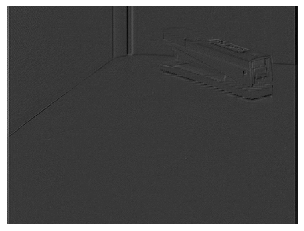

In [4]:
show_edges(edges)

We can see that the edges are extracted well. We can use the result of this simple algorithm as a baseline and compare the results of other algorithms to it.

## Derivative of Gaussian 

When considering the situation when there is strong noise in an image, the ups and downs of the noise will induce strong peaks in the gradient profile. In order to be more noise-robust, an algorithm introduced a Gaussian filter before applying the gradient filer. In another way, convolving a gradient filter after a Gaussian filter equals to convolving a derivative of Gaussian filter directly to the image.

Here is how this intuition is represented in math:

$$(I\bigotimes g)\bigotimes h = I\bigotimes (g\bigotimes h) $$

Where $I$ is the image, $g$ is the gradient filter and $h$ is the Gaussian filter. A two dimensional derivative of Gaussian kernel is dipicted in the following figure:

<img src="images/derivative_of_gaussian.png" width="400"/>

### Implementation

In our implementation, we initialize Gaussian filters by applying the 2D Gaussian function on a given size of the grid which is the same as the kernel size. Then the x and y direction image filters are calculated as the convolution of the Gaussian filter and the gradient filter:

In [ ]:
x_filter = scipy.signal.convolve2d(gaussian_filter, np.asarray([[1, -1]]), 'same')
y_filter = scipy.signal.convolve2d(gaussian_filter, np.asarray([[1], [-1]]), 'same')

Then both of the filters are applied to the input image to extract the x and y direction edges. For detailed implementation, please view by:

In [ ]:
psource(gaussian_derivative_edge_detector)

### Example

Now let's try again on the stapler image and plot the extracted edges:

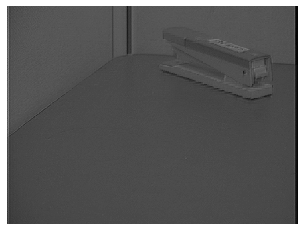

In [5]:
e = gaussian_derivative_edge_detector(im)
show_edges(e)

We can see that the extracted edges are more similar to the original one. The resulting edges are depending on the initial Gaussian kernel size and how it is initialized.

## Laplacian Edge Detector

Laplacian is somewhat different from the methods we have discussed so far. Unlike the above kernels which are only using the first-order derivatives of the original image, the Laplacian edge detector uses the second-order derivatives of the image. Using the second derivatives also makes the detector very sensitive to noise. Thus the image is often Gaussian smoothed before applying the Laplacian filter.

Here are how the Laplacian detector looks like:

<img src="images/laplacian.png" width="200"/>

### Implementation

There are two commonly used small Laplacian kernels:

<img src="images/laplacian_kernels.png" width="300"/>

In our implementation, we used the first one as the default kernel and convolve it with the original image using packages provided by `scipy`.

### Example

Now let's use the Laplacian edge detector to extract edges of the staple example:

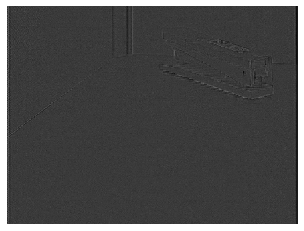

In [6]:
e = laplacian_edge_detector(im)
show_edges(e)

The edges are more subtle but meanwhile showing small zigzag structures that may be affected by noise. However, the overall performance of edge extracting is still promising.